In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sys
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


sys.path.append('../Functions/')

from importlib import reload
from group01 import Group01

In [2]:
test_obj = Group01("Test Object")
test_obj.get_data()

test_obj.df.head()

downloads directory already exists
data file already exists
reading data file into pandas dataframe...
data_geographical file already exists
reading data_geographical file into pandas geo dataframe...


,Entity,Year,tfp,output,inputs,ag_land_index,labor_index,capital_index,materials_index,output_quantity,...,ag_land_quantity,labor_quantity,capital_quantity,machinery_quantity,livestock_quantity,fertilizer_quantity,animal_feed_quantity,cropland_quantity,pasture_quantity,irrigation_quantity
0,Afghanistan,1961,65.0814,44.8285,68.8807,91.6812,44.5145,141.5215,35.9132,2566730,...,10571,1704,8866,5,6339,57345,2068912,7700,30000,2380
1,Afghanistan,1962,64.0637,45.6182,71.2075,92.2016,45.0207,163.6547,36.3829,2611942,...,10631,1723,10253,6,6228,58146,2082012,7760,30000,2380
2,Afghanistan,1963,61.6217,45.9729,74.6051,92.6352,45.5528,202.0577,37.0801,2632254,...,10681,1743,12659,8,6547,59694,2007829,7810,30000,2380
3,Afghanistan,1964,65.1109,49.0775,75.3752,93.1816,46.1108,203.8875,37.5294,2810010,...,10744,1765,12773,8,6732,60006,2140272,7873,30000,2380
4,Afghanistan,1965,63.8587,51.2121,80.1960,93.1990,46.6948,270.9746,38.5949,2932230,...,10746,1787,16976,12,6946,61821,2171226,7875,30000,2380


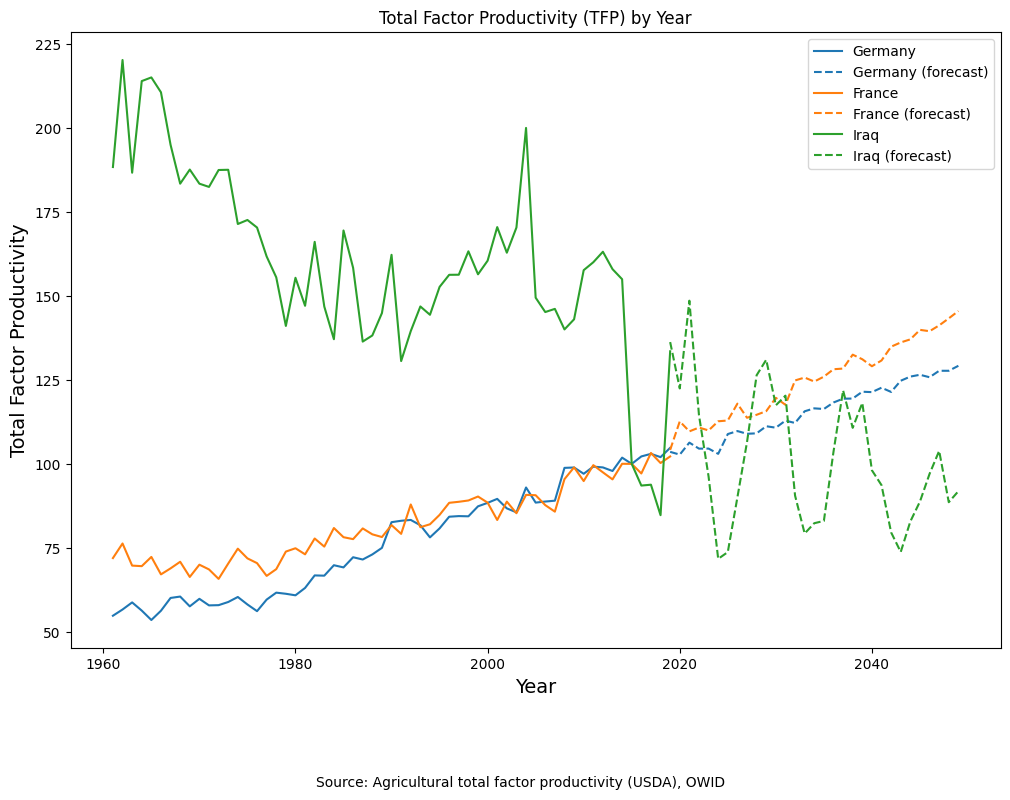

In [3]:
test_obj.predictor(['Germany','France','Iraq'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

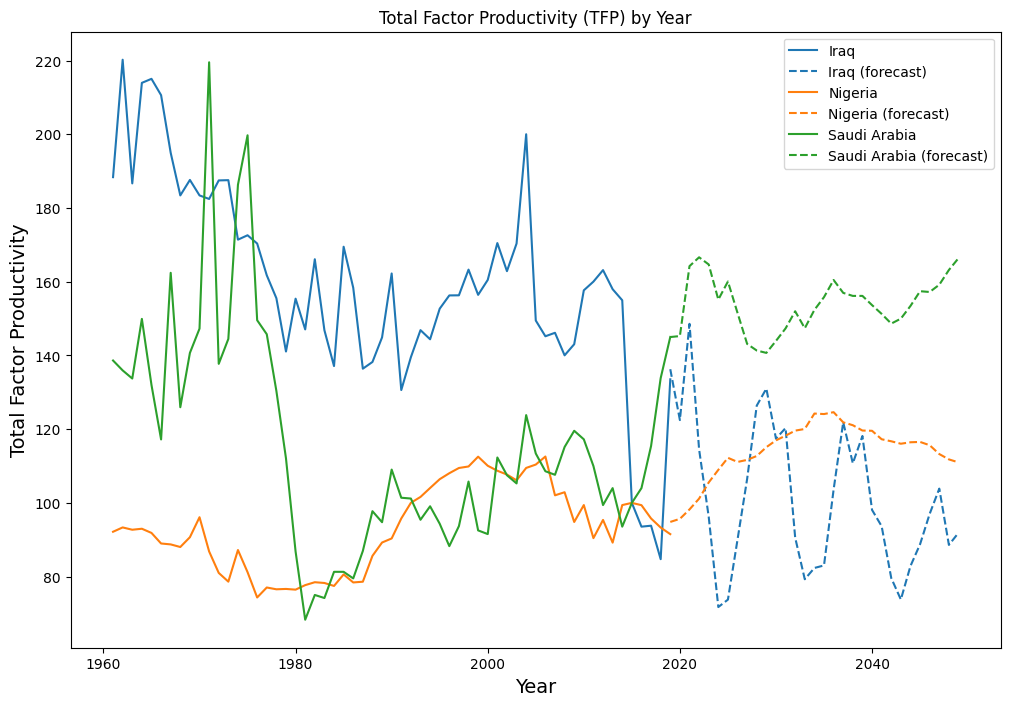

In [3]:
test_obj.predictor(['Iraq','Nigeria', 'Saudi Arabia'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

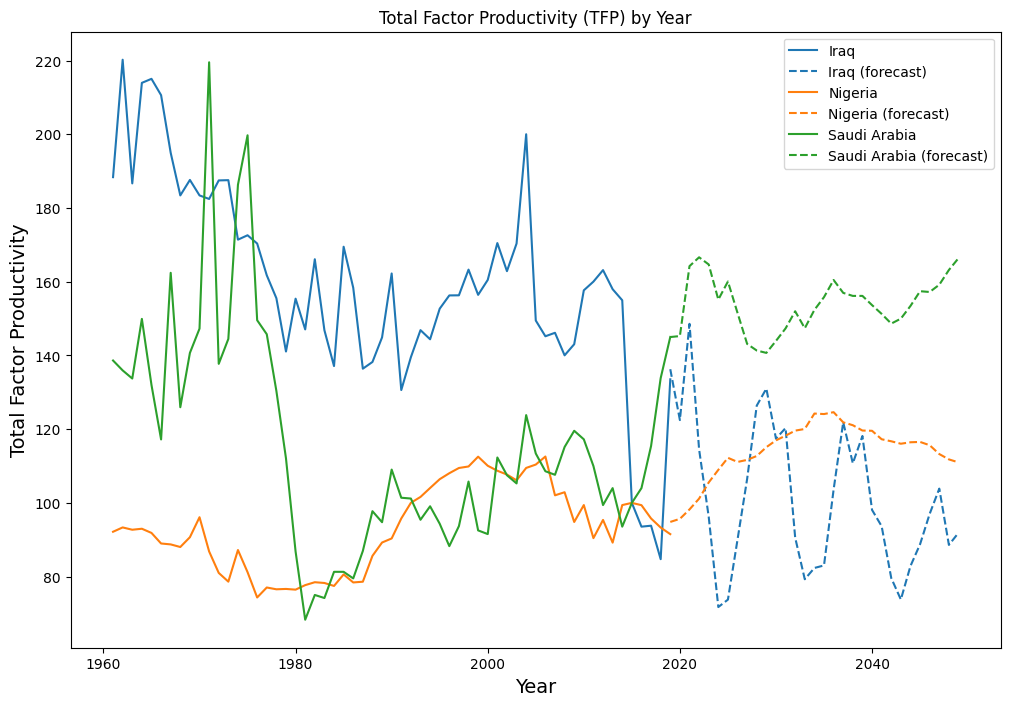

In [4]:
test_obj.predictor(['Iraq','Nigeria', 'Saudi Arabia'])

In [5]:
test_obj.df_geographical

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [3]:
# Calculate the best values for a range of p,d,q to get the best ARIMA model
# This code is based on the following article: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
import itertools
import statsmodels.api as sm
import pandas as pd

# Define the range of p, d, and q values to test
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

# Generate all possible combinations of p, d, and q values
pdq_values = list(itertools.product(p_values, d_values, q_values))

# Set the date column as the index
test_obj.df['Year'] = pd.to_datetime(test_obj.df['Year'])
test_obj.df.set_index('Year', inplace=True)

# Define the data for the ARIMA model
data = test_obj.df
# This sets the frequency of the index to 'YS'
data.index.freq = 'YS'


# Define the AIC and BIC values
aic_values = []
bic_values = []

# Loop through all combinations of p, d, and q values
for pdq in pdq_values:
    try:
        # Create the ARIMA model with the current combination of p, d, and q values
        model = sm.tsa.ARIMA(data['tfp'], order=pdq)
        # Fit the model to the data
        results = model.fit()
        # Append the AIC and BIC values to their respective lists
        aic_values.append(results.aic)
        bic_values.append(results.bic)
    except:
        continue

# Find the index of the minimum AIC value
min_aic_index = aic_values.index(min(aic_values))
# Find the corresponding optimal combination of p, d, and q values
optimal_pdq_aic = pdq_values[min_aic_index]

# Find the index of the minimum BIC value
min_bic_index = bic_values.index(min(bic_values))
# Find the corresponding optimal combination of p, d, and q values
optimal_pdq_bic = pdq_values[min_bic_index]

print(f'Optimal p,d,q values based on AIC: {optimal_pdq_aic}')
print(f'Optimal p,d,q values based on BIC: {optimal_pdq_bic}')


c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not mo

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

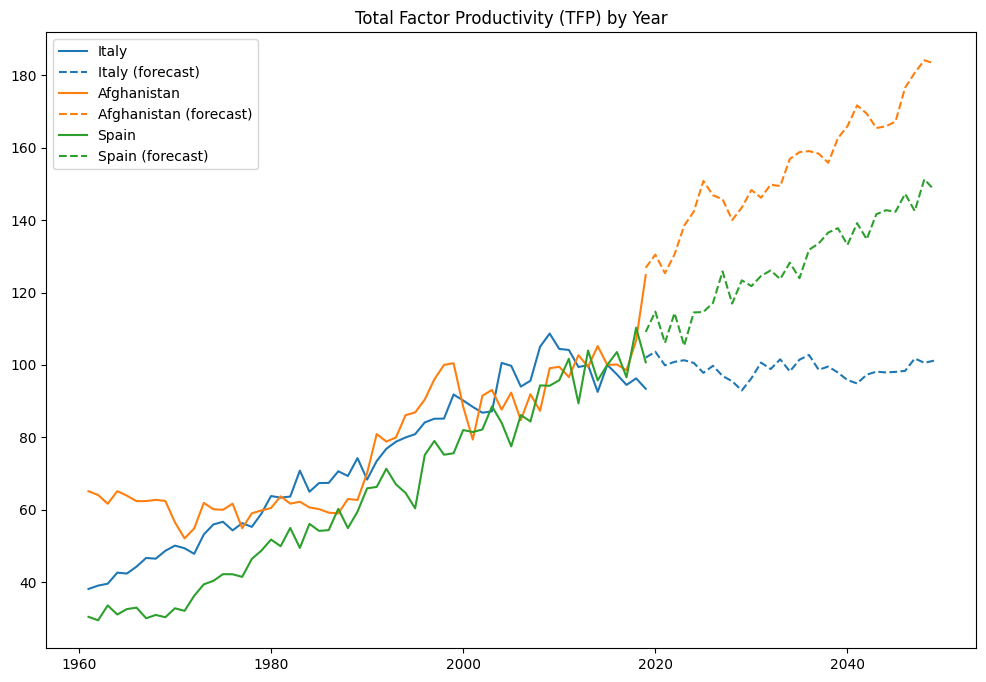

In [3]:
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

In [ ]:
# p --> between 15-25
# d --> between 1-4
# q --> between 0-4

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

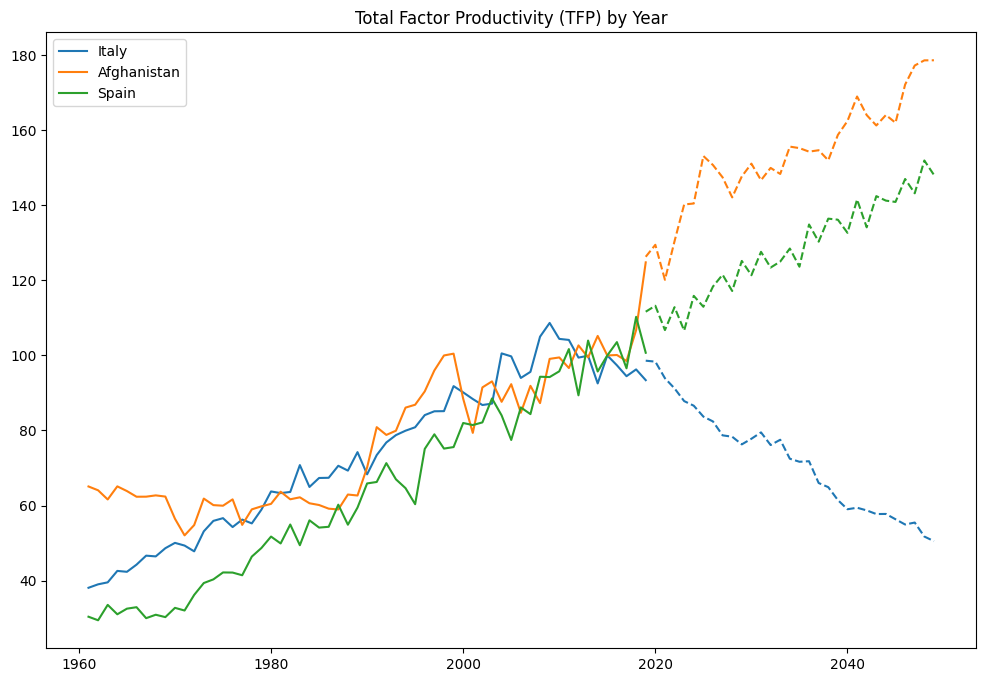

In [3]:
# 20,2,4
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

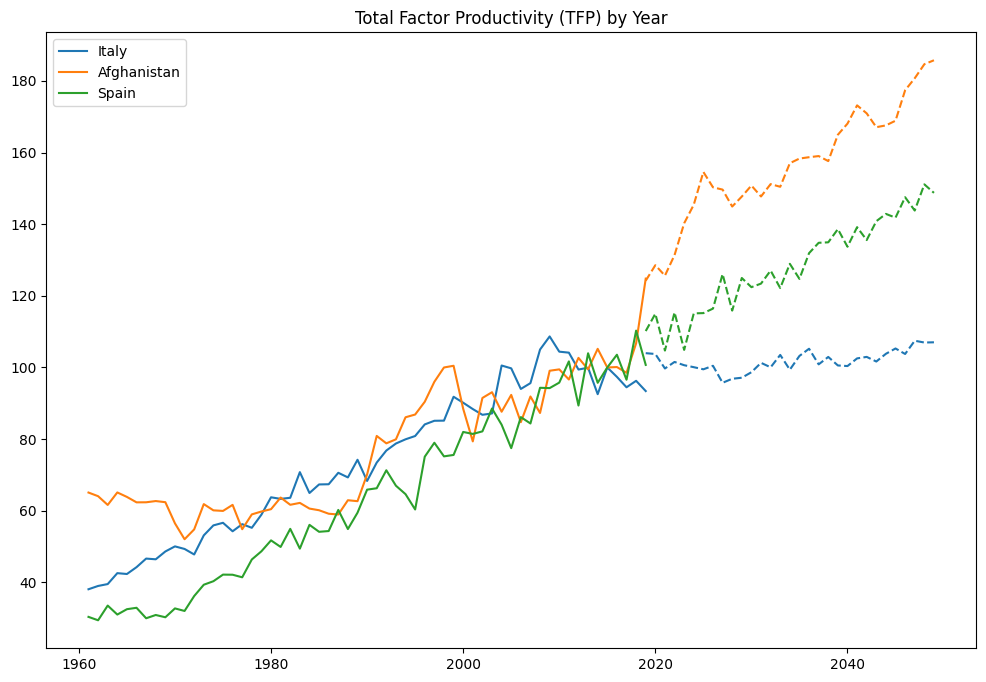

In [3]:
# 20,2,3
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

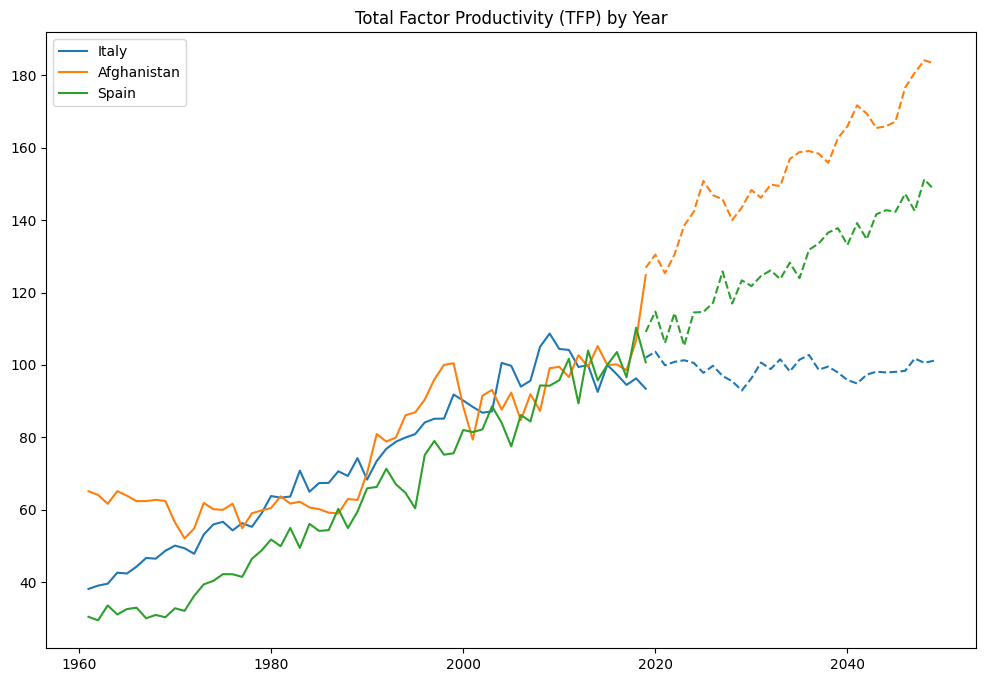

In [3]:
# 20,2,2
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


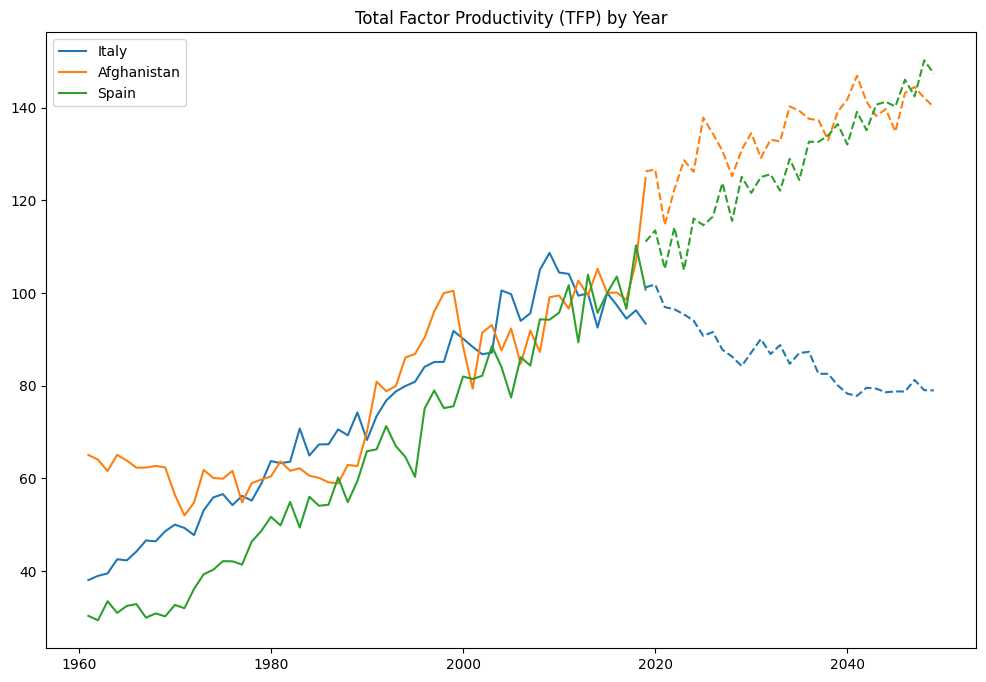

In [3]:
# 20,1,2
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.

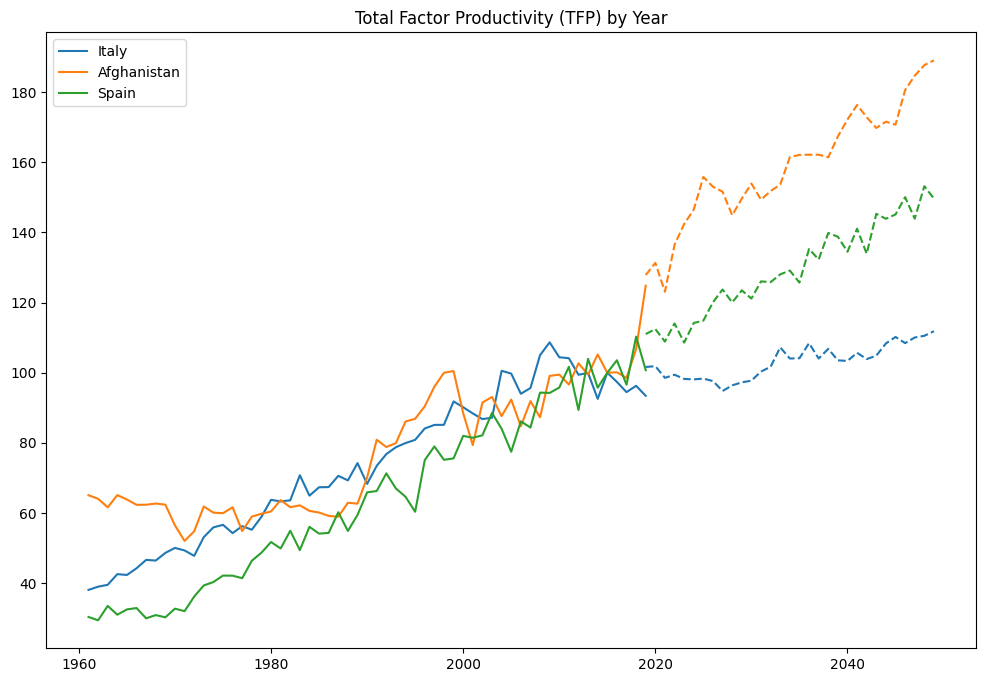

In [3]:
# 25,2,3
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

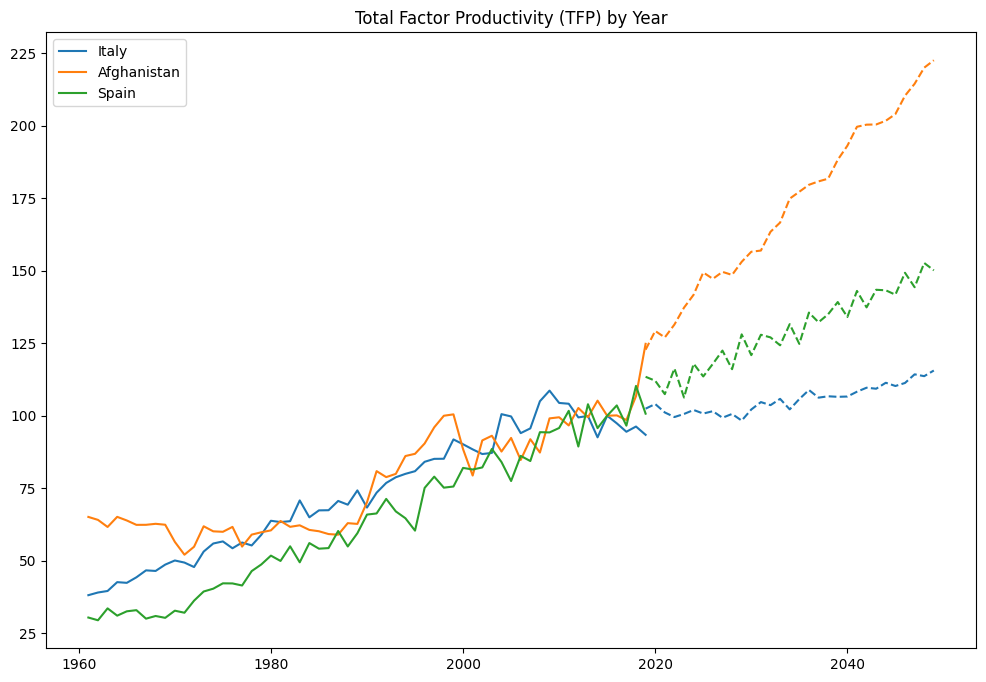

In [3]:
# 15,2,3
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


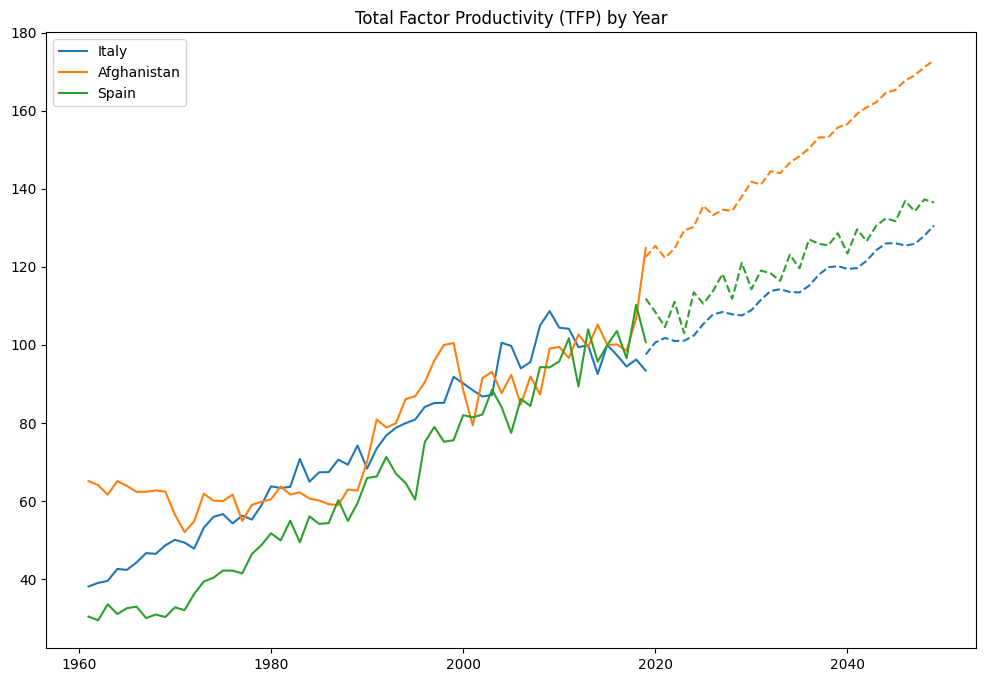

In [3]:
# 10,2,3
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

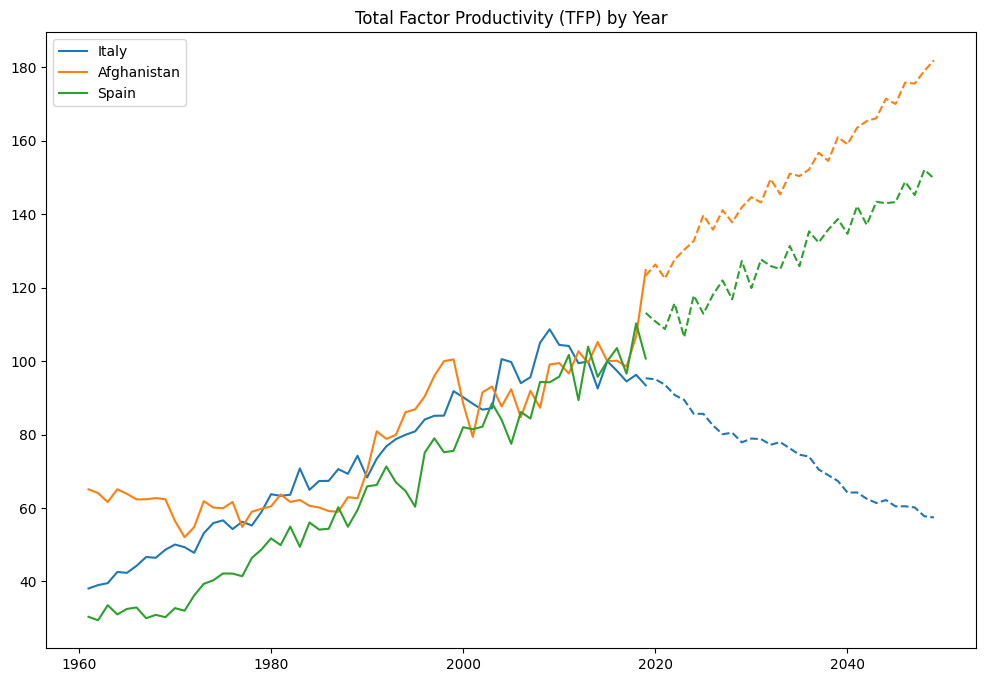

In [3]:
# 10,2,4
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn

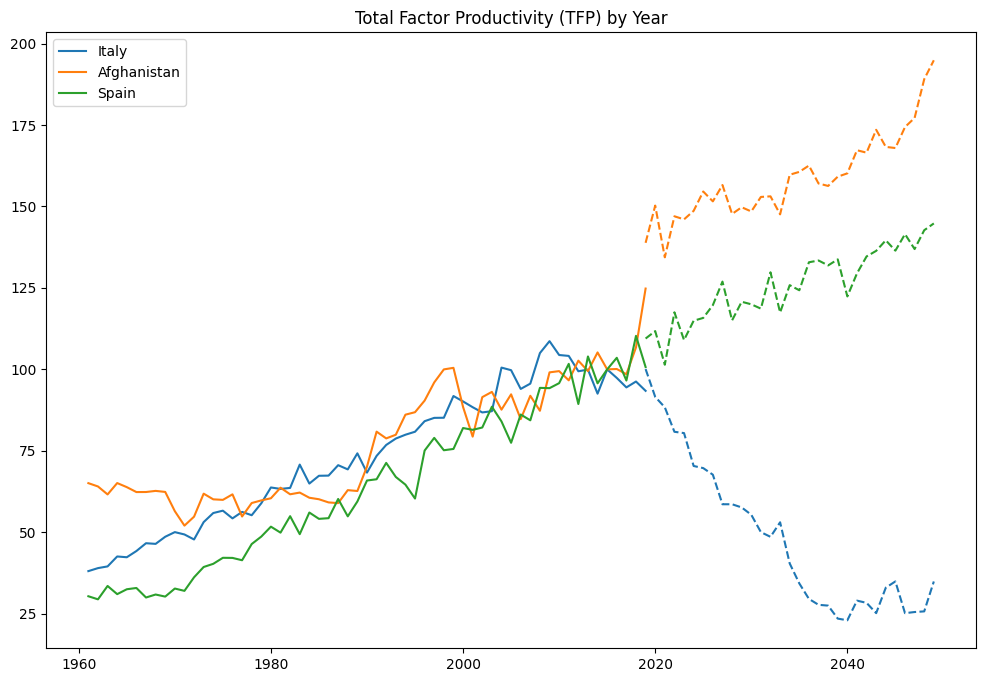

In [3]:
# p=40
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn

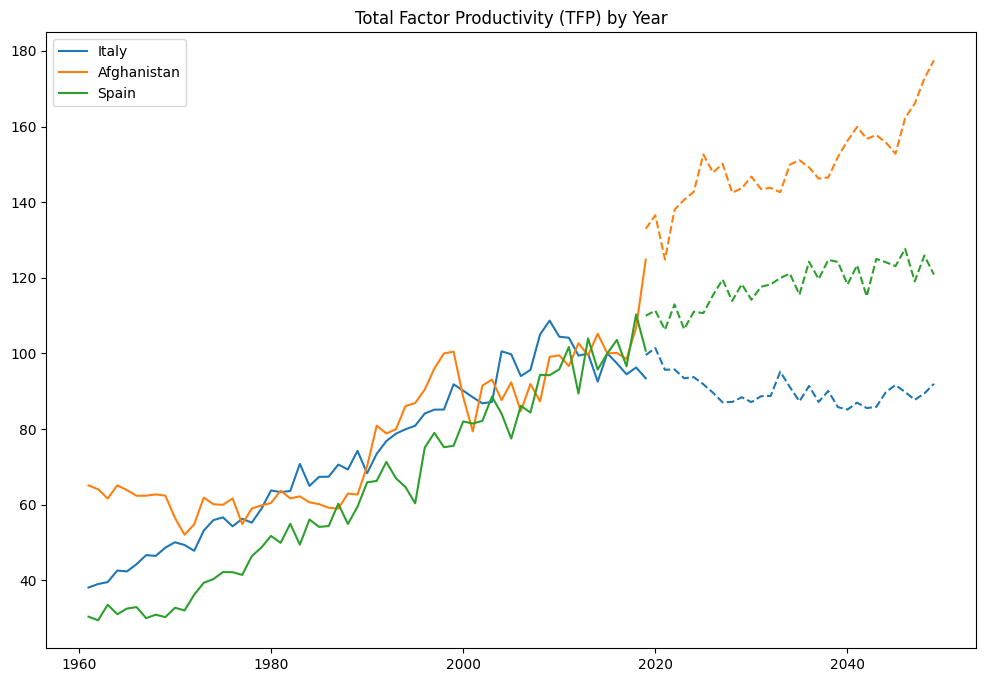

In [3]:
# p=30
test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


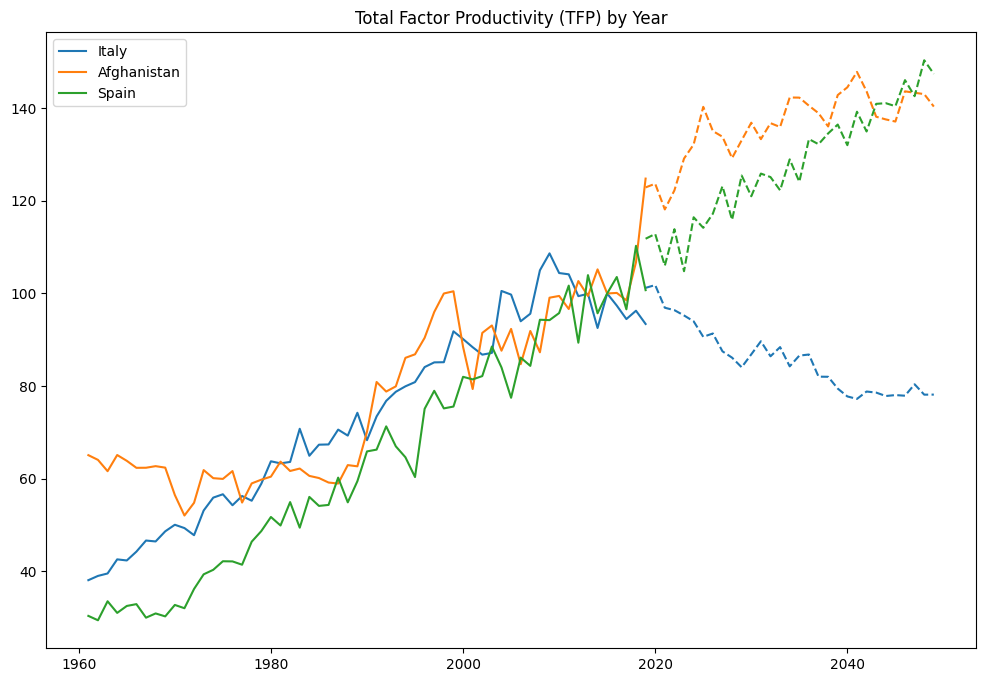

In [3]:
# p=20

test_obj.predictor(['Italy', 'Afghanistan', 'Spain'])

In [ ]:
# Error measurement
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract the TFP and years values
tfp = data['tfp'].values
years = data['Year'].values

# Split the data into training and testing sets
train_size = int(len(tfp) * 0.8)
train_tfp, test_tfp = tfp[:train_size], tfp[train_size:]
train_years, test_years = years[:train_size], years[train_size:]

# Fit the ARIMA model on the training set
model = ARIMA(train_tfp, order=(15, 2, 2))
model_fit = model.fit()

# Generate predictions for the training and testing sets
train_predictions = model_fit.predict(start=train_years[-1], end=train_years[-1]+len(train_tfp)-1, dynamic=True)
test_predictions = model_fit.predict(start=test_years[0], end=test_years[0]+len(test_tfp)-1, dynamic=True)

# Calculate the mean squared error for the training and testing sets
train_mse = mean_squared_error(train_tfp, train_predictions)
test_mse = mean_squared_error(test_tfp, test_predictions)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

c:\Users\leonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


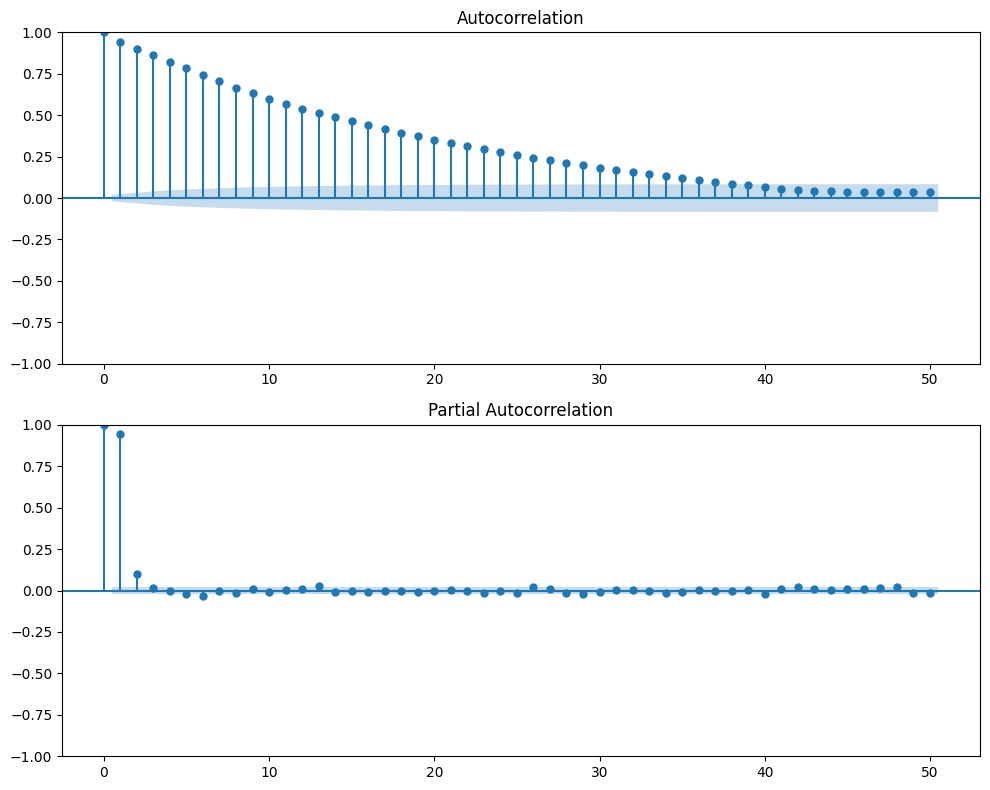

In [4]:
# Plot the ACF and PACF
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
plot_acf(test_obj.df['tfp'], lags=50, ax=axes[0])
plot_pacf(test_obj.df['tfp'], lags=50, ax=axes[1])
plt.tight_layout()
plt.show()

# We can observe there is no seasonality in the data checking the ACF and PACF plots

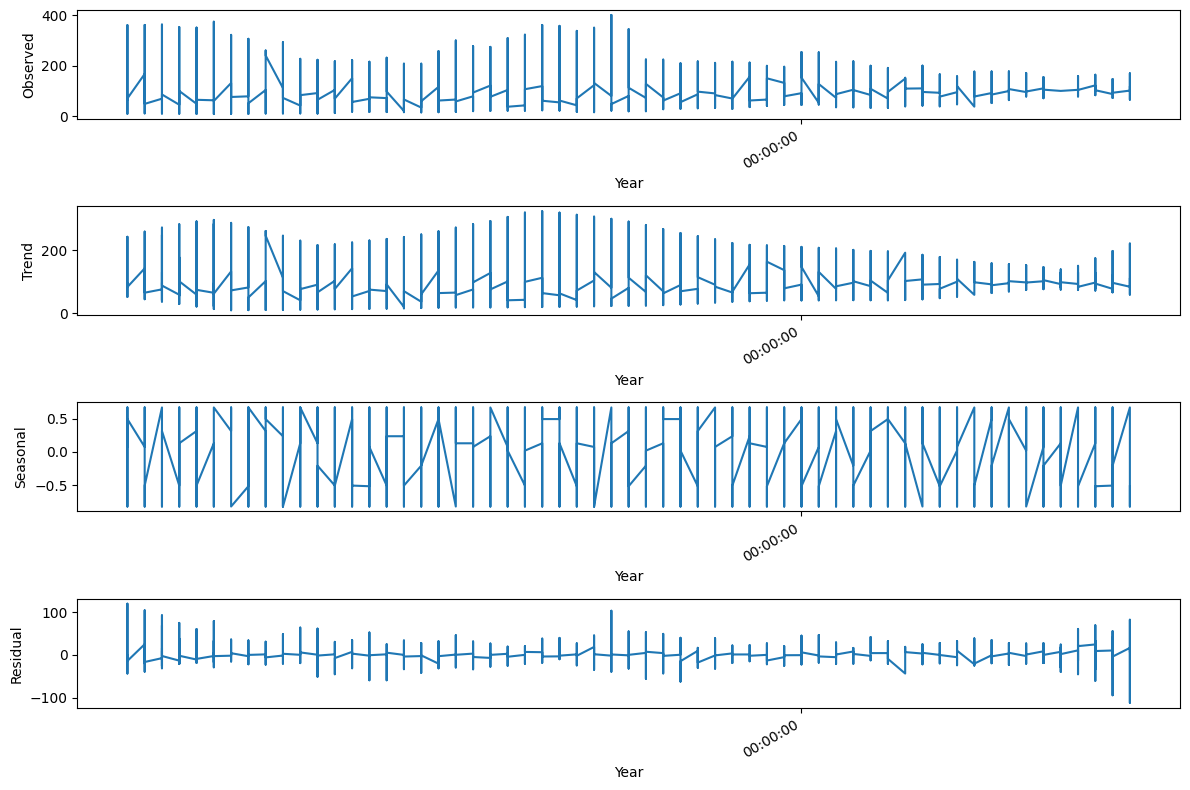

In [5]:
# Check seasonality
# Set the date column as the index
test_obj.df['Year'] = pd.to_datetime(test_obj.df['Year'])
test_obj.df.set_index('Year', inplace=True)

# Apply seasonal decomposition to the "tfp" column
decomposition = seasonal_decompose(test_obj.df['tfp'], model='additive', period=12)

# Plot the results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

# We can observe there is no seasonality in the data checking the seasonal decomposition plot

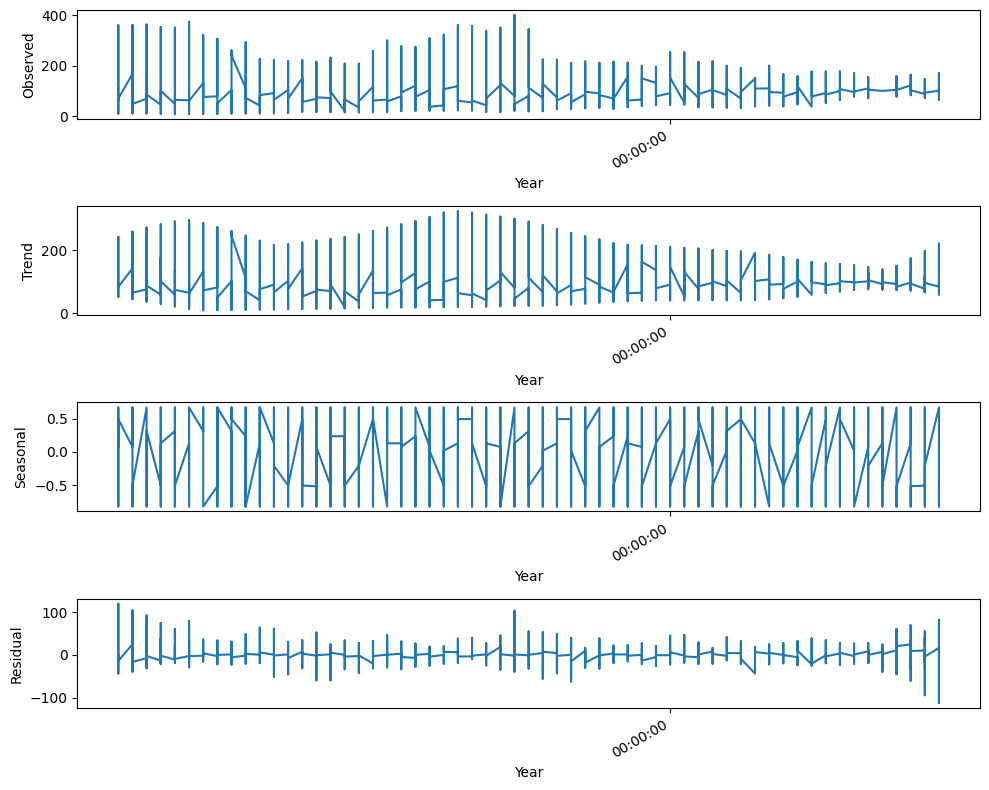

In [6]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(test_obj.df['tfp'], period=12)

# Plot the decomposed components
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
decomposition.observed.plot(ax=axes[0], ylabel='Observed')
decomposition.trend.plot(ax=axes[1], ylabel='Trend')
decomposition.seasonal.plot(ax=axes[2], ylabel='Seasonal')
decomposition.resid.plot(ax=axes[3], ylabel='Residual')
plt.tight_layout()
plt.show()

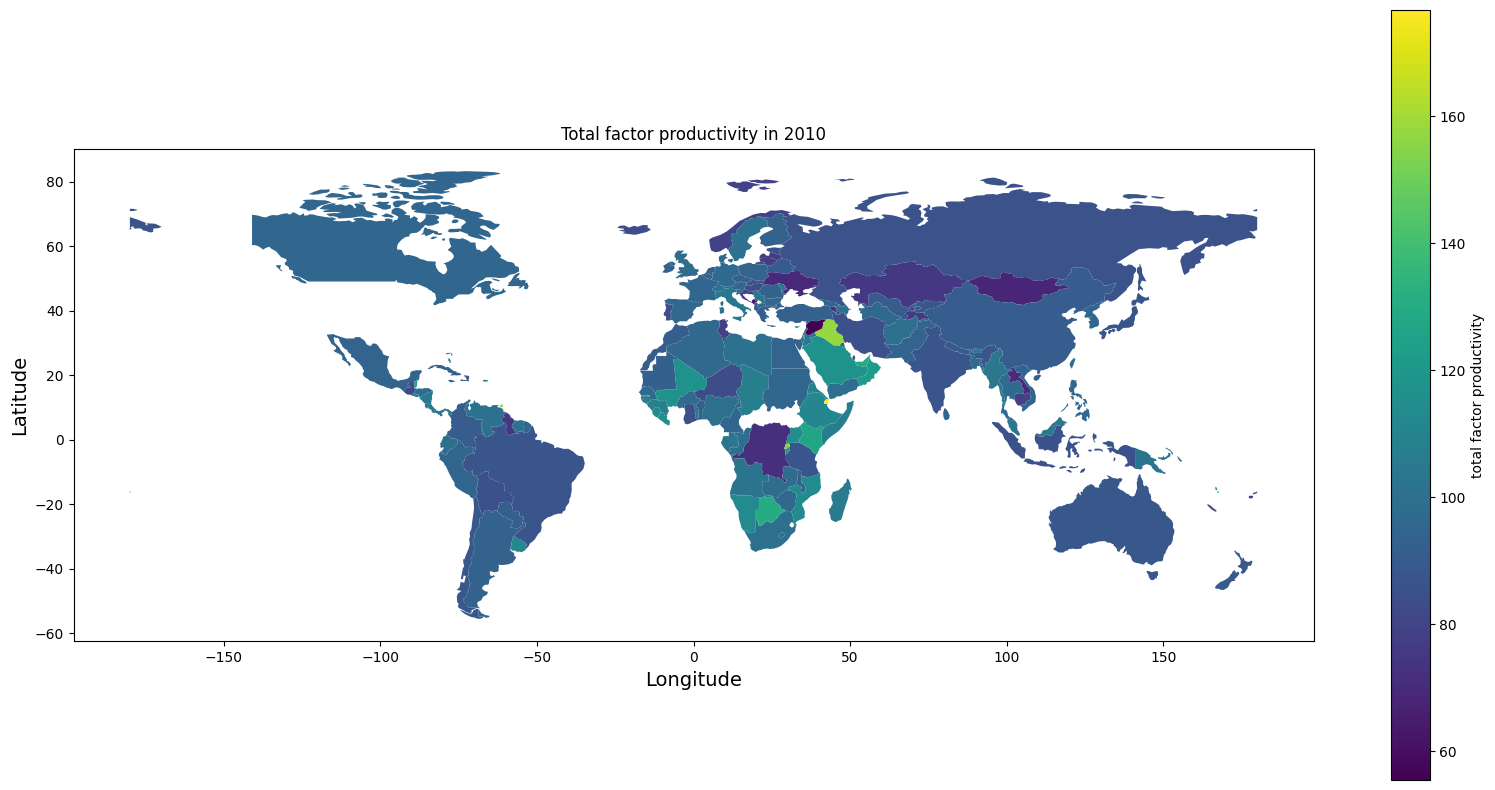

In [3]:
test_obj.choropleth(2010)

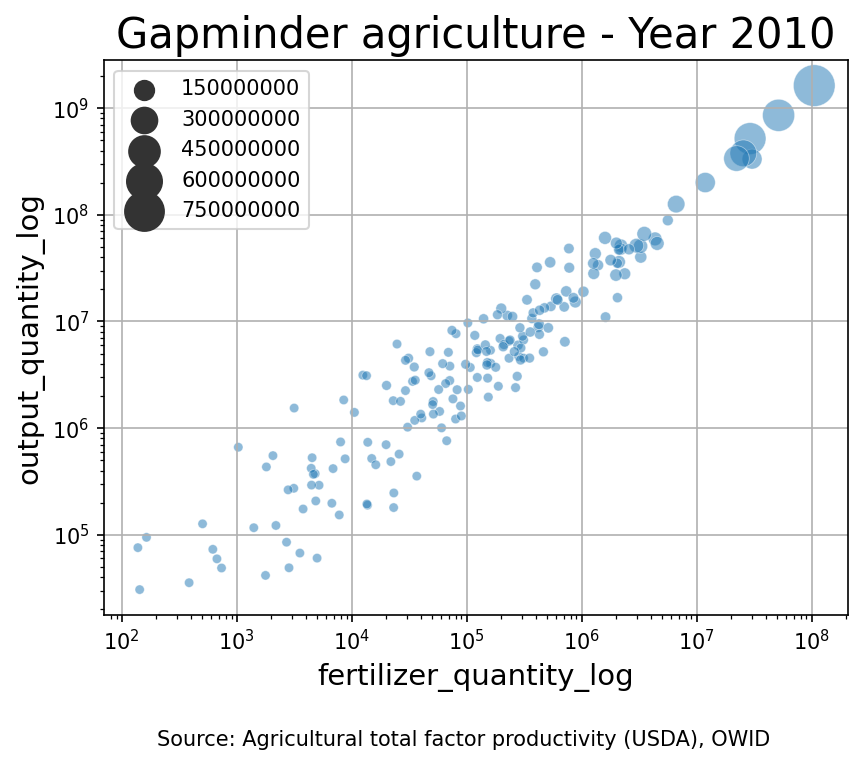

In [7]:
test_obj.gapminder(2010, True)

In [4]:
corr_matrix = test_obj.df.corr()
display(corr_matrix)

/var/folders/63/x4r8bns93xq03nn8llf3hqj40000gn/T/ipykernel_89222/343409393.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = test_obj.df.corr()


,Year,tfp,output,inputs,ag_land_index,labor_index,capital_index,materials_index,output_quantity,crop_output_quantity,...,ag_land_quantity,labor_quantity,capital_quantity,machinery_quantity,livestock_quantity,fertilizer_quantity,animal_feed_quantity,cropland_quantity,pasture_quantity,irrigation_quantity
Year,1.000000,0.276645,0.551345,0.349193,0.212458,-0.161100,0.493490,0.312273,0.088959,0.086105,...,0.013416,0.017994,0.068768,0.098717,0.035001,0.068196,0.072286,0.005866,-0.004665,0.051889
tfp,0.276645,1.000000,0.493373,-0.081697,0.026948,-0.171523,0.028708,0.049059,-0.053870,-0.058344,...,-0.105810,-0.109015,-0.061919,-0.038517,-0.092891,-0.067312,-0.058501,-0.109580,-0.101550,-0.088204
output,0.551345,0.493373,1.000000,0.762186,0.591019,0.369652,0.594353,0.614158,0.028849,0.014175,...,-0.034708,-0.088980,0.049340,0.057319,-0.039848,0.037025,0.054513,-0.034470,-0.063490,-0.035822
inputs,0.349193,-0.081697,0.762186,1.000000,0.695742,0.645898,0.652529,0.713607,0.063511,0.046757,...,0.026826,-0.046721,0.103116,0.092798,0.006884,0.092234,0.105862,0.031071,-0.011042,0.005375
ag_land_index,0.212458,0.026948,0.591019,0.695742,1.000000,0.496250,0.362727,0.378013,0.038147,0.028297,...,0.018727,-0.025199,0.057753,0.056635,0.002909,0.054576,0.063814,0.019237,-0.007641,0.010762
labor_index,-0.161100,-0.171523,0.369652,0.645898,0.496250,1.000000,0.145966,0.314360,0.022832,0.012193,...,0.015330,-0.025754,0.059538,0.044446,-0.004799,0.052549,0.057639,0.022167,-0.011678,-0.011408
capital_index,0.493490,0.028708,0.594353,0.652529,0.362727,0.145966,1.000000,0.438561,0.017229,0.000247,...,-0.036346,-0.107099,0.058783,0.045498,-0.038645,0.023709,0.048781,-0.034566,-0.040802,-0.049642
materials_index,0.312273,0.049059,0.614158,0.713607,0.378013,0.314360,0.438561,1.000000,0.023605,0.011418,...,-0.005424,-0.057734,0.043394,0.044274,-0.020553,0.043889,0.055673,-0.002074,-0.029296,-0.019641
output_quantity,0.088959,-0.053870,0.028849,0.063511,0.038147,0.022832,0.017229,0.023605,1.000000,0.995726,...,0.927258,0.839196,0.954382,0.959861,0.941774,0.979715,0.956957,0.916555,0.868659,0.942218
crop_output_quantity,0.086105,-0.058344,0.014175,0.046757,0.028297,0.012193,0.000247,0.011418,0.995726,1.000000,...,0.930101,0.878097,0.930221,0.945151,0.955539,0.967738,0.930686,0.917066,0.869111,0.962622


animal_output_quantity as third variable

In [5]:
# Select the two columns of interest
cols_of_interest = ['fertilizer_quantity', 'output_quantity']
target_cols = test_obj.df[cols_of_interest]

# Select the columns to calculate correlation with
other_cols = test_obj.df.drop(cols_of_interest, axis=1)

# Calculate correlation matrix
corr_matrix = other_cols.corrwith(target_cols, drop = True)

# Subset correlation matrix to only show correlations with target columns
corr_with_target = corr_matrix[cols_of_interest]

# Get absolute values of correlation matrix
corr_with_target_abs = corr_with_target.abs()

# Find highest correlation value and corresponding column name
highest_corr = corr_with_target_abs.max()
highest_corr_col = corr_with_target_abs.idxmax()

display(corr_matrix)
display(corr_matrix)
display(corr_with_target)
display(highest_corr)
display(highest_corr_col)



/var/folders/63/x4r8bns93xq03nn8llf3hqj40000gn/T/ipykernel_89222/2264706586.py:9: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = other_cols.corrwith(target_cols, drop = True)


KeyError: "None of [Index(['fertilizer_quantity', 'output_quantity'], dtype='object')] are in the [index]"

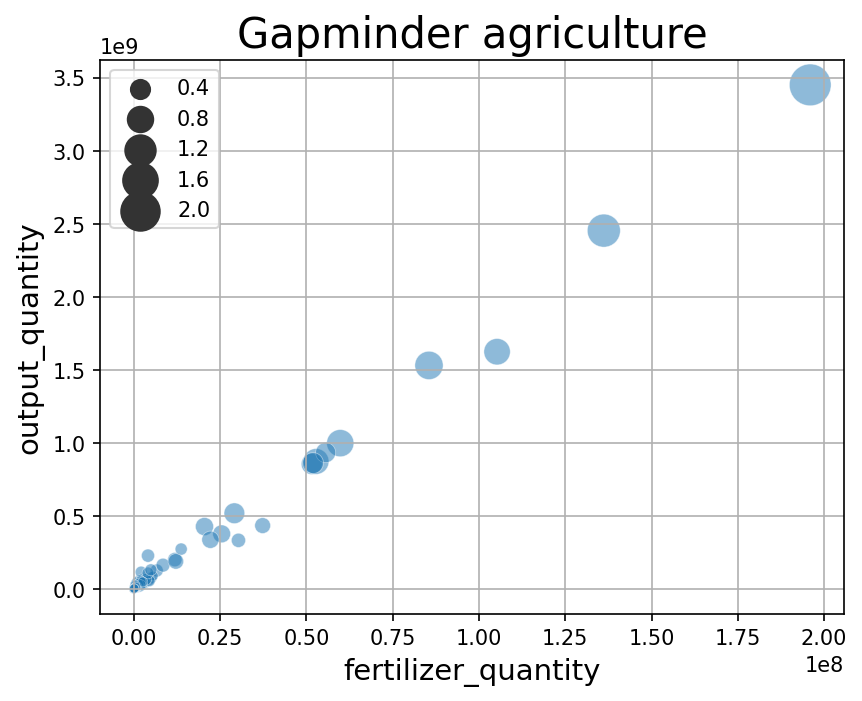

In [6]:
test_obj.gapminder(2010)

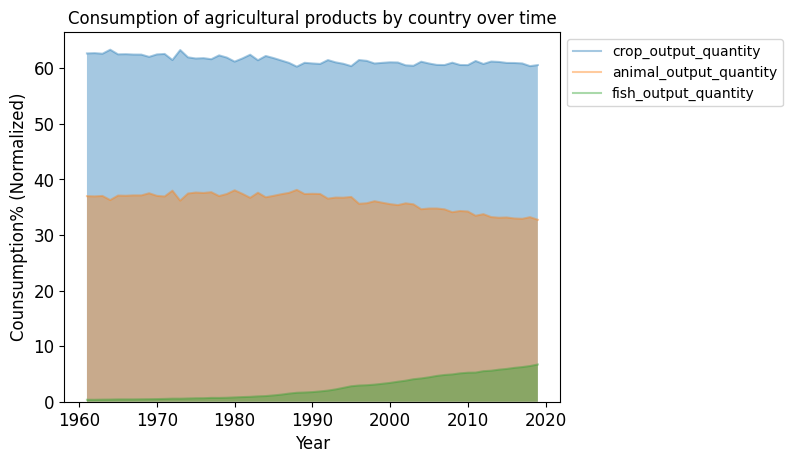

    crop_output_quantity  animal_output_quantity  fish_output_quantity  Year  \
0              62.663260               36.985624              0.351116  1961   
1              62.712419               36.939767              0.347814  1962   
2              62.604215               37.021926              0.373858  1963   
3              63.330143               36.283353              0.386504  1964   
4              62.497008               37.088043              0.414948  1965   
5              62.525788               37.055279              0.418933  1966   
6              62.459433               37.122517              0.418051  1967   
7              62.448782               37.114781              0.436437  1968   
8              62.041554               37.505390              0.453056  1969   
9              62.484292               37.040132              0.475576  1970   
10             62.569336               36.926065              0.504599  1971   
11             61.478997               3

In [7]:
test_obj.plot_area_chart('World', normalize=True)

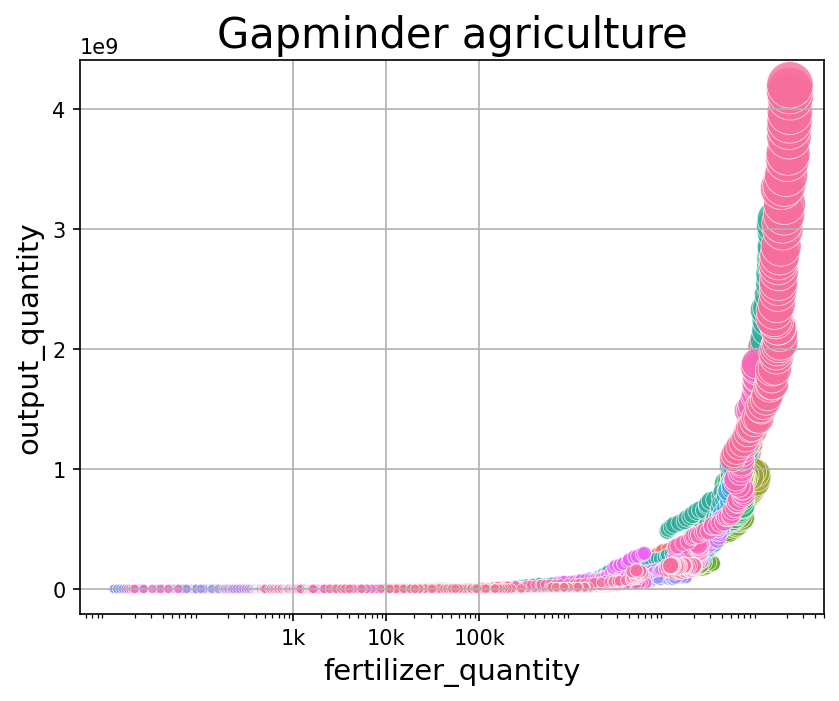

In [8]:
# Increase the graph size
plt.figure(dpi=150)
# Store population as a numpy array: np_pop
np_pop = np.array(test_obj.df.animal_output_quantity)
np_pop2 = np_pop*2
#Let's change the opacity 
#sns.scatterplot(test_obj.df['fertilizer_quantity'], test_obj.df['output_quantity'], hue = test_obj.df['Entity'], legend = False, 
#                size=np_pop2, sizes=(20,500), alpha = 0.8)
sns.scatterplot(x='fertilizer_quantity', y='output_quantity', hue='Entity', data=test_obj.df, legend=False, size=np_pop2, sizes=(20,500), alpha=0.8)

plt.grid(True)
plt.xscale('log')
plt.xlabel('fertilizer_quantity', fontsize = 14)
plt.ylabel('output_quantity', fontsize = 14)
plt.title('Gapminder agriculture', fontsize = 20)
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
#Add description to the biggest countries
#plt.text(1550, 67, 'India')
#plt.text(5650, 75, 'China')
plt.show()

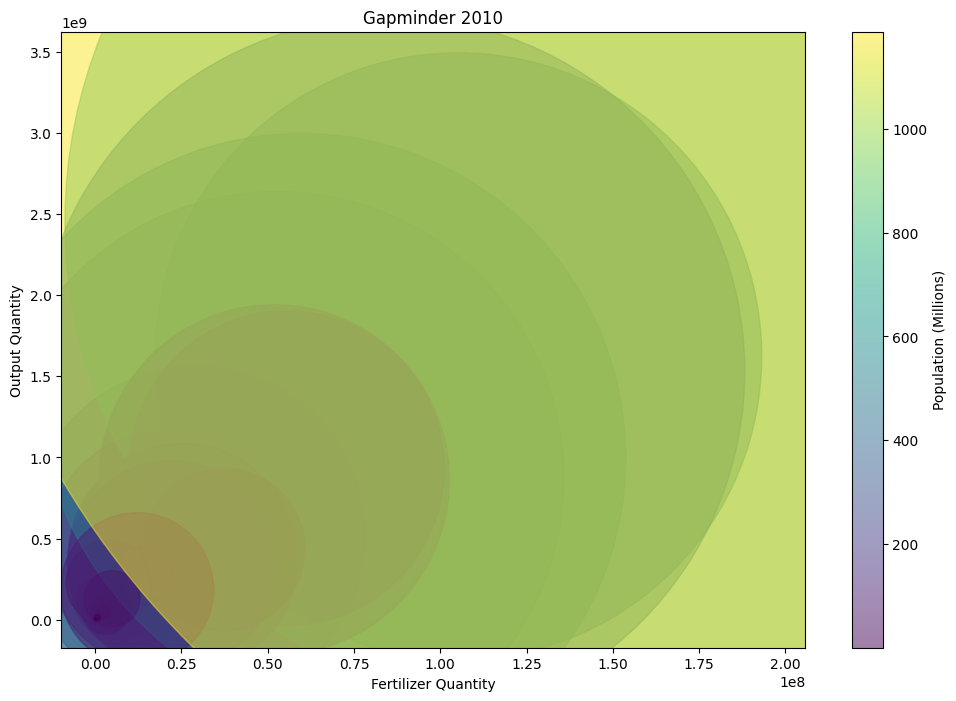

In [9]:
# filter data by year
year_data = test_obj.df[test_obj.df['Year'] == 2010]

# calculate the third relevant variable for dot size
dot_size = (year_data['animal_output_quantity'] / 1e6) ** 2

# plot the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(
x=year_data['fertilizer_quantity'],
y=year_data['output_quantity'],
s=dot_size,
alpha=0.5,
c=year_data['animal_output_quantity'] / 1e6,
cmap='viridis'
            )
plt.xlabel('Fertilizer Quantity')
plt.ylabel('Output Quantity')
plt.title(f'Gapminder {2010}')
plt.colorbar(label='Population (Millions)')
plt.show()

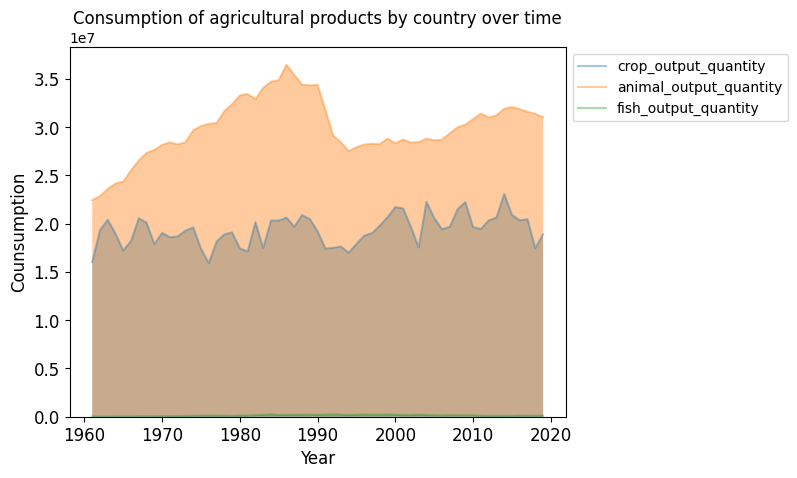

In [12]:
test_obj.plot_area_chart('Germany', normalize=False)